# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrRu-2019-08-30.zip
unzip autoriaNumberplateOcrRu-2019-08-30.zip
mv autoriaNumberplateOcrRu-2019-08-30 ru
```
or use your own dataset.

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [3]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "ru"
VERSION = "2020_10_12_tensorflow_v2.3"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [4]:
class ru(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "K", "M", "O", "P", "T", "X", "Y"]
        
        self.EPOCHS = 2

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'5', 'M', '9', '4', 'C', '1', '3', '7', 'O', 'H', 'X', 'Y', 'B', 'K', 'T', '8', '6', 'E', 'A', 'P', '2', '0'}
Letters val  {'5', 'M', '9', '4', 'C', '1', '3', '7', 'O', 'H', 'X', 'Y', 'B', 'K', 'T', '8', 'E', 'A', 'P', '0', '2', '6'}
Letters test  {'5', 'M', '9', '4', 'C', '1', '3', '7', 'O', 'H', 'X', 'Y', 'B', 'K', 'T', '8', 'E', 'A', 'P', '0', '2', '6'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


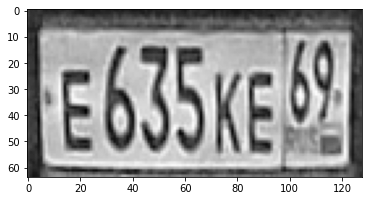

2) the_labels (plate number): E635KE69 is encoded as [13, 6, 3, 5, 15, 13, 6, 9, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED


In [21]:
ocrTextDetector = ru()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False)

In [21]:
# A = {'O', '9', '7', 'M', '2', 'E', 'Y', 'C', 'P', 'T', 'H', 'K', '1', '5', '3', '8', 'X', '4', '6', 'A', 'B', '0'}
# B = {'O', '9', '7', '2', 'E', 'Y', 'C', 'P', 'T', 'H', 'K', '1', '5', '3', '8', 'X', '4', '6', 'A', 'B', '0'}
# A-B

In [22]:
model = ocrTextDetector.train()


START TRAINING
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
____________________________________________________________________________

In [23]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 B1072PB32
True: 			 B172PB30

Predicted: 		 Y059YY190
True: 			 Y059TY190

Predicted: 		 C183TX22
True: 			 C783TT23

Predicted: 		 P528CT33
True: 			 P528CT3

Predicted: 		 X413BP89
True: 			 X413BP69

Predicted: 		 C741PH174
True: 			 C741PH178

Predicted: 		 T970XOY123
True: 			 T970XO723

Predicted: 		 O216OC44
True: 			 O216OC4

Predicted: 		 H538EO92
True: 			 538EO92

Predicted: 		 A212YP197
True: 			 O312YP197

Predicted: 		 P142TB178
True: 			 P142TH178

Predicted: 		 E199AY17
True: 			 E199AY12

Predicted: 		 E890KX90
True: 			 E890KX50

Predicted: 		 A457HY27
True: 			 A857HY27

Predicted: 		 X125KX1
True: 			 X125KX11

Predicted: 		 K158HA14
True: 			 K158MA14

Predicted: 		 X222BY96
True: 			 X282BY96

Predicted: 		 T889XT64
True: 			 T889XT654

Predicted: 		 O039OO27
True: 			 O039OO22

Predicted: 		 K639AY161
True: 			 K639AY61

Predicted: 		 X630EY14
True: 			 X630EY74

Predicted: 		 A265KK92
True: 			 A265XA92

Predicted: 		 O999YP99
True: 			 

In [24]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_12_tensorflow_v2.3.h5


In [28]:
# Train with aug

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'5', 'M', '9', '4', 'C', '1', '3', '7', 'O', 'H', 'X', 'Y', 'B', 'K', 'T', '8', '6', 'E', 'A', 'P', '2', '0'}
Letters val  {'5', 'M', '9', '4', 'C', '1', '3', '7', 'O', 'H', 'X', 'Y', 'B', 'K', 'T', '8', 'E', 'A', 'P', '0', '2', '6'}
Letters test  {'5', 'M', '9', '4', 'C', '1', '3', '7', 'O', 'H', 'X', 'Y', 'B', 'K', 'T', '8', 'E', 'A', 'P', '0', '2', '6'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


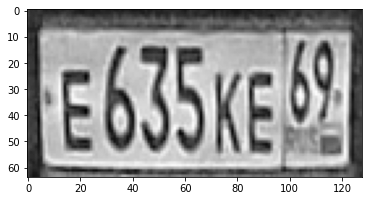

2) the_labels (plate number): E635KE69 is encoded as [13, 6, 3, 5, 15, 13, 6, 9, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
____________________________

In [24]:
for i in range(1):
    ocrTextDetector = ru()
    ocrTextDetector.EPOCHS = 1

    model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

    model = ocrTextDetector.train(load_last_weights=True,is_random=1)
    #ocrTextDetector.test(verbose=True)

In [23]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 B072EB32
True: 			 B072PB32

Predicted: 		 E221TO35
True: 			 E221TO36

Predicted: 		 Y403BH16
True: 			 Y403BH14

Predicted: 		 X185AC138
True: 			 X185AC136

Predicted: 		 T980OA161
True: 			 T980CA161

Predicted: 		 A271YX52
True: 			 A271HX52

Predicted: 		 H060HH174
True: 			 M060HH174

Predicted: 		 K968HY799
True: 			 K968HX799

Predicted: 		 T699AP197
True: 			 T689AP197

Predicted: 		 H687OK50
True: 			 H687OK52

Predicted: 		 K417AE777
True: 			 K417AE797

Predicted: 		 O595HA60
True: 			 O595HA62

Predicted: 		 E707EE727
True: 			 E707EE777

Predicted: 		 T419AA136
True: 			 T417AA136

Predicted: 		 E329KO98
True: 			 E329KO48

Predicted: 		 C757EY345
True: 			 C757EY45

Predicted: 		 X013XE154
True: 			 X013XE152

Predicted: 		 X359KT16
True: 			 X359KT163

Predicted: 		 A995KX37
True: 			 H995KX37

Predicted: 		 B185BP15
True: 			 B185BP05
Test processing time: 1.3949100971221924 seconds
acc: 0.9929701230228472


In [19]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_12_tensorflow_v2.3.h5


In [22]:
ocrTextDetector.load(RESULT_MODEL_PATH, verbose=False)

In [9]:
ocrTextDetector.load('/home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5', verbose=True)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
____________________________________________________________________________________________

In [8]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir=RESULT_MODEL_PATH)
converter.convert()
converter.save(output_saved_model_dir)

INFO:tensorflow:Linked TensorRT version: (7, 2, 0)
INFO:tensorflow:Loaded TensorRT version: (7, 2, 0)


OSError: SavedModel file does not exist at: /home/www/nomeroff-net/models/anpr_ocr_ru_2020_10_07_tensorflow_v2.3.h5/{saved_model.pbtxt|saved_model.pb}

In [8]:
converter.convert()

OSError: SavedModel file does not exist at: /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_08_tensorflow_v2.2.h5/{saved_model.pbtxt|saved_model.pb}

In [9]:
from NomeroffNet.Base import convert_keras_to_freeze_pb

ImportError: cannot import name 'convert_keras_to_freeze_pb'

In [13]:
RESULT_MODEL_PATH1 = '/var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2'
RESULT_MODEL_PATH_TRT = '/var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2_trt'

In [12]:
#ocrTextDetector.save(RESULT_MODEL_PATH1, verbose=True)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2/assets
SAVED TO /var/www/nomeroff-net/models/anpr_ocr_ru_2020_09_09_tensorflow_v2


In [14]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = trt.TrtGraphConverterV2(input_saved_model_dir=RESULT_MODEL_PATH1)
converter.convert()
converter.save(RESULT_MODEL_PATH_TRT)

INFO:tensorflow:Linked TensorRT version: (7, 1, 3)
INFO:tensorflow:Loaded TensorRT version: (7, 1, 3)
INFO:tensorflow:Could not find TRTEngineOp_0_0 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_1 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_4 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_3 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngineOp_0_5 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
INFO:tensorflow:Could not find TRTEngi